# Simple Linear Regression Project

**Business Problem: Predict the Salary based on the Years of Experience.**

**Introduction:** In this project, I have used Linear Regression method to predict the salary based on the years of experience.
I took the sample dataset from Kaggle.com website. 

**1. Import the libraries**

In [39]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**2. Import the dataset as pandas dataframe**

In [40]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='datasets_10624_14867_Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

salary_data = pd.read_csv(body)
salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [41]:
salary_data.shape

(30, 2)

**3. Plot Years of Experience vs Salary**

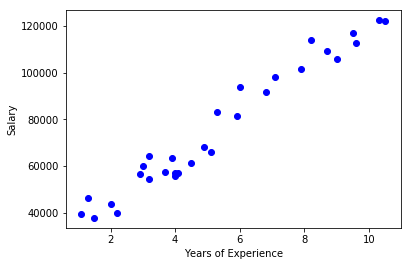

In [42]:
plt.scatter(salary_data.YearsExperience, salary_data.Salary, color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

**4. Creating train and test data**

In [43]:
X= salary_data['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [44]:
y= salary_data['Salary'].values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 1) (24, 1)
Test set: (6, 1) (6, 1)


**5. Modeling**

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9469.6069012]]
Intercept:  [26149.54627037]


In [47]:
print("The linear model is: y = {:.5} + {:.5}X".format(regr.intercept_[0], regr.coef_[0][0]))

The linear model is: y = 2.615e+04 + 9469.6X


Text(0, 0.5, 'Salary')

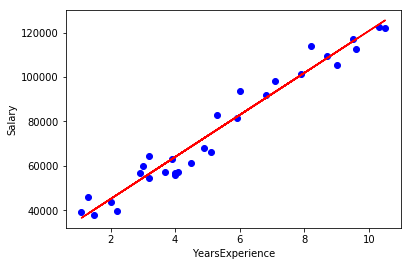

In [48]:
plt.scatter(X, y,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

**6. Evaluate the Model**

In [54]:
yhat= regr.predict(X_test)
yhat[0:6]

array([[ 64027.97387518],
       [ 93383.75526891],
       [123686.49735277],
       [ 72550.62008627],
       [ 90542.87319855],
       [111376.0083812 ]])

In [50]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(yhat , y_test) )

R2-score: 0.94


Result: The accuracy of our linear model is approximately 94%. 